In [1]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util, visualization_utils as viz_utils
import cv2 
import numpy as np
from matplotlib import pyplot as plt

from matplotlib import pyplot as plt
%matplotlib inline

from datetime import datetime
import time as tm  # Import the time module with an alias

import csv

In [3]:
#MODEL_PATH = 'D:\\AnprProject\\myModels\\tfodModel\\export\\saved_model'
MODEL_PATH = os.path.join('myModels','tfodModel','export','saved_model')
#LABEL_MAP_NAME = 'label_map.pbtxt'
#ANNOTATION_PATH = os.path.join('Tensorflow', 'workspace', 'annotations')
LABELMAP = os.path.join('Annotations','annotations_tfod','label_map.pbtxt')
#LABELMAP = os.path.join(ANNOTATION_PATH, LABEL_MAP_NAME)

# Ensure annotation path exists
os.makedirs(ANNOTATION_PATH, exist_ok=True)

# Create label map
labels = [{'name':'licence', 'id':1}]
with open(LABELMAP, 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# Load the TensorFlow saved model
model = tf.saved_model.load(MODEL_PATH)

# Assuming the function signature is 'serving_default' and it takes an image tensor
infer = model.signatures['serving_default']

# Define the detection function
def detect_fn(image):
    input_tensor = tf.convert_to_tensor(image)
    input_tensor = input_tensor[tf.newaxis, ...]
    output_dict = infer(input_tensor)
    return output_dict

# Set up video capture
#cap = cv2.VideoCapture(r'C:\Users\Msdn08\Desktop\Test_Img\testvideo2.mp4')
cap = cv2.VideoCapture(0)

# Create category index
category_index = label_map_util.create_category_index_from_labelmap(LABELMAP)

# Processing frames in the video
while cap.isOpened(): 
    ret, frame = cap.read()
    if not ret:
        print("Ignoring empty camera frame.")
        continue
    
    # Convert frame to numpy array
    image_np = np.array(frame)

    # Run detection
    detections = detect_fn(image_np)
    
    # Extract items from the detections dictionary
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
    detections['num_detections'] = num_detections
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    
    # Visualization of the results of a detection
    label_id_offset = 0
    image_np_with_detections = image_np.copy()
    detection_threshold = 0.5
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'] + label_id_offset,
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=5,
        min_score_thresh=detection_threshold,
        agnostic_mode=False     
    )

    # Display output
    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (900, 700)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

##### *From image*

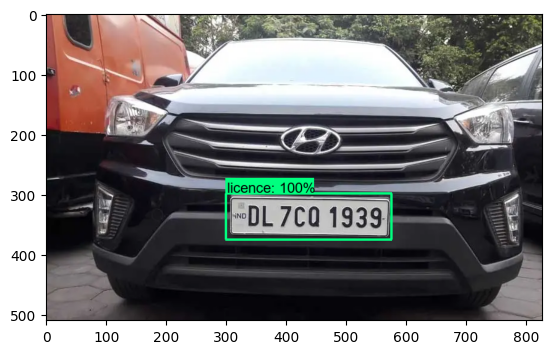

In [6]:
#MODEL_PATH = 'D:\\AnprProject\\myModels\\tfodModel\\export\\saved_model'
#LABEL_MAP_NAME = 'label_map.pbtxt'
#ANNOTATION_PATH = os.path.join('Tensorflow', 'workspace', 'annotations')
#ANNOTATION_PATH = os.path.join('Annotations','annotations_tfod')
#LABELMAP = os.path.join(ANNOTATION_PATH, LABEL_MAP_NAME)

MODEL_PATH = os.path.join('myModels','tfodModel','export','saved_model')
LABELMAP = os.path.join('Annotations','annotations_tfod','label_map.pbtxt')
# Ensure annotation path exists
os.makedirs(ANNOTATION_PATH, exist_ok=True)

# Create label map
labels = [{'name':'licence', 'id':1}]
with open(LABELMAP, 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# Load the TensorFlow saved model
model = tf.saved_model.load(MODEL_PATH)
category_index = label_map_util.create_category_index_from_labelmap(LABELMAP)
# Assuming the function signature is 'serving_default' and it takes an image tensor
infer = model.signatures['serving_default']

# Define the detection function
def detect_fn(image):
    input_tensor = tf.convert_to_tensor(image, dtype=tf.uint8)  # Convert to uint8
    input_tensor = input_tensor[tf.newaxis, ...]
    output_dict = infer(input_tensor)
    return output_dict

# Read and preprocess the input image
IMAGE_PATH = r'C:\Users\Msdn08\Desktop\Test_Img\img5.jpg'
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

# Run detection
detections = detect_fn(image_np)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# Visualization
label_id_offset = 0
image_np_with_detections = image_np.copy()
min_threshold=0.2
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'] + label_id_offset,
    detections['detection_scores'],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=10,
    min_score_thresh=min_threshold,
    agnostic_mode=False
)
# Display the result
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Define paths
MODEL_PATH = 'D:\\AnprProject\\myModels\\tfodModel\\export\\saved_model'
LABEL_MAP_NAME = 'label_map.pbtxt'
ANNOTATION_PATH = os.path.join('annotations')
LABELMAP = os.path.join(ANNOTATION_PATH, LABEL_MAP_NAME)

# Ensure annotation path exists
os.makedirs(ANNOTATION_PATH, exist_ok=True)

# Create label map
labels = [{'name':'licence', 'id':1}]
with open(LABELMAP, 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# Load the TensorFlow saved model
model = tf.saved_model.load(MODEL_PATH)
category_index = label_map_util.create_category_index_from_labelmap(LABELMAP)
# Assuming the function signature is 'serving_default' and it takes an image tensor
infer = model.signatures['serving_default']

# Define the detection function
def detect_fn(image):
    input_tensor = tf.convert_to_tensor(image, dtype=tf.uint8)  # Convert to uint8
    input_tensor = input_tensor[tf.newaxis, ...]
    output_dict = infer(input_tensor)
    return output_dict

# Read and preprocess the input image
IMAGE_PATH = r'C:\Users\Msdn08\Desktop\Test_Img\img5.jpg'
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

# Run detection
detections = detect_fn(image_np)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# Visualization
label_id_offset = 0
image_np_with_detections = image_np.copy()
min_threshold=0.2
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'] + label_id_offset,
    detections['detection_scores'],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=10,
    min_score_thresh=min_threshold,
    agnostic_mode=False
)
try:
    text =get_serialized_detected_labels(detections, category_index, min_threshold)
    if text != previous_text:  # Check if the current text is different from the previous one    os.makedirs(folder_path)
        save_results(text)
        previous_text = text  # Update the previous_text variable
except:
    pass
# Display the result
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()